In [1]:
import pandas as pd
import os
from src.model_acquisition import ModelAcquisition
from src.feature_extraction_new import FeatureExtractor, CoverDataAugmentation, SteganalysisSpecificFeatures, AdvancedFeatureExtractor
from src.feature_selection import PSOFeatureSelection
from src.classifier import StegoClassifier
from src.config import config

print("Starting AI Model Steganalysis Research...")


Using device: cpu
Starting AI Model Steganalysis Research...


#### Step 1: Model Acquisition

In [2]:
print("\n=== Step 1: Model Acquisition ===")
model_acquirer = ModelAcquisition()
original_models = model_acquirer.download_pretrained_models()


=== Step 1: Model Acquisition ===


#### # Step 2: Stego Model Creation

In [3]:
from src.stego_generator import StegoGenerator
print("\n=== Step 2: Stego Model Creation ===")
# injector = StegoInjector()
generetor = StegoGenerator()
stego_models = generetor.create_stego_models(original_models)


=== Step 2: Stego Model Creation ===
Using device: cpu

=== Membuat stego models untuk resnet50 ===
Proses: resnet50_rate_0.001_bit_0


c:\Users\oktan\Research\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\src\stego_generator.py:124: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_0
Proses: resnet50_rate_0.001_bit_1
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_1
Proses: resnet50_rate_0.001_bit_2
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_2
Proses: resnet50_rate_0.001_bit_3
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_3
Proses: resnet50_rate_0.001_bit_4
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_4
Proses: resnet50_rate_0.001_bit_5
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_5
Proses: resnet50_rate_0.001_bit_6
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_6
Proses: resnet50_rate_0.001_bit_7
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_7
Proses: resnet50_rate_0.001_bit_8
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_8
Proses: resnet50_rate_0.001_bit_9
✓ Stego model sudah ada, load dari file: resnet50_rate_0.001_bit_9
Proses: resnet50_rate_0.

#### # Step 3: Feature Extraction & Combine Feature

In [4]:
feature_extractor = FeatureExtractor()
all_features = []

Test data prepared successfully


##### # Extract features from cover models

In [5]:
# Extract features from cover models
for model_name, model in original_models.items():
    features = feature_extractor.extract_all_features(model, model_name, "cover")
    all_features.append(features)

Extracting features for resnet50...
  Extracted 2000 weight samples
Autoencoder trained successfully
  Reconstruction loss: 0.022587
  Gradient features: {'grad_mean': 1.45082255786065, 'grad_std': 2.0453555060697357, 'grad_max': 9.37143611907959}
  Entropy features calculated for 4 bit-planes
Extracting features for mobilenet_v3_small...
  Extracted 2000 weight samples
  Reconstruction loss: 0.329912
  Gradient features: {'grad_mean': 8.89092241731328, 'grad_std': 8.915754448283048, 'grad_max': 62.6021728515625}
  Entropy features calculated for 4 bit-planes


##### # Extract features from stego models

In [6]:
for model_name, model in stego_models.items():
    features = feature_extractor.extract_all_features(model, model_name, "stego")
    all_features.append(features)

Extracting features for resnet50_rate_0.001_bit_0...
  Extracted 2000 weight samples
  Reconstruction loss: 0.022537
  Gradient features: {'grad_mean': 1.4801639821496069, 'grad_std': 2.0661136171487375, 'grad_max': 9.694055557250977}
  Entropy features calculated for 4 bit-planes
Extracting features for resnet50_rate_0.001_bit_1...
  Extracted 2000 weight samples
  Reconstruction loss: 0.031428
  Gradient features: {'grad_mean': 1.4284779439153878, 'grad_std': 2.0144626889163493, 'grad_max': 9.133458137512207}
  Entropy features calculated for 4 bit-planes
Extracting features for resnet50_rate_0.001_bit_2...
  Extracted 2000 weight samples
  Reconstruction loss: 0.024556
  Gradient features: {'grad_mean': 1.4248115039945388, 'grad_std': 2.0090857761009797, 'grad_max': 9.217483520507812}
  Entropy features calculated for 4 bit-planes
Extracting features for resnet50_rate_0.001_bit_3...
  Extracted 2000 weight samples
  Reconstruction loss: 0.033503
  Gradient features: {'grad_mean': 1.

##### # Create features DataFrame

In [7]:
features_df = pd.DataFrame(all_features)
features_path = os.path.join(config.DATA_DIR, "features", "all_features.csv")
features_df.to_csv(features_path, index=False)
print(f"Features saved to {features_path}")

Features saved to c:\Users\oktan\Research\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\data\features\all_features.csv


In [8]:
loaded_df = pd.read_csv(features_path)
print("Loaded DataFrame shape:", loaded_df.head())


Loaded DataFrame shape:    weight_mean  weight_std  weight_skew  weight_kurtosis  reconstruction_loss  \
0    -0.002697    0.126102    -0.470610        23.121422             0.022587   
1     0.013165    0.489729     1.180156        13.322737             0.329912   
2    -0.003711    0.126024    -0.905304        22.292515             0.022537   
3     0.000637    0.139506     0.523155        25.627272             0.031428   
4    -0.004687    0.128076    -0.455390        27.221270             0.024556   

   grad_mean  grad_std   grad_max  entropy_bit_0  entropy_bit_1  \
0   1.450823  2.045356   9.371436       0.974898       0.993342   
1   8.890922  8.915754  62.602173       0.990605       0.992774   
2   1.480164  2.066114   9.694056       0.984990       0.991570   
3   1.428478  2.014463   9.133458       0.969169       0.996046   
4   1.424812  2.009086   9.217484       0.983269       0.996257   

   entropy_bit_2  entropy_bit_3                 model_name model_type  \
0       0.997

#### # Step 4: Feature Selection with PSO

In [9]:
print("\n=== Step 4: Feature Selection with PSO ===")
classifier = StegoClassifier()
X, y = classifier.prepare_data(features_df)

pso_selector = PSOFeatureSelection()
feature_mask, best_score = pso_selector.optimize(X, y)


=== Step 4: Feature Selection with PSO ===
Starting PSO feature selection with 12 features...


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only

Iteration 10/20, Best F1: 0.9884


c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\oktan\anaconda3\envs\thesis-py310\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only

Iteration 20/20, Best F1: 0.9892
PSO completed. Best F1-score: 0.9892
Selected 1 out of 12 features


#### # Step 5: Model Training and Evaluation


=== Step 5: Model Training and Evaluation ===
Using 1 selected features

Training random_forest...

random_forest Performance:
Accuracy: 0.9355
Precision: 0.9667
Recall: 0.9667
F1_score: 0.9667


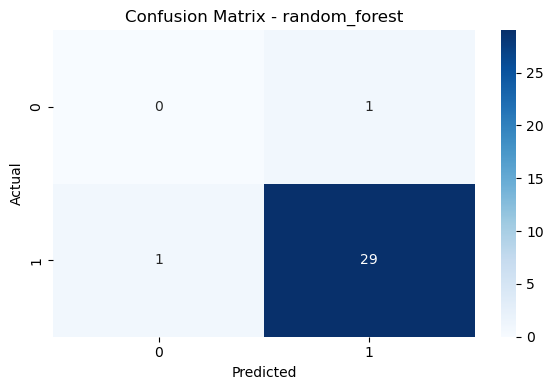


Training gradient_boosting...

gradient_boosting Performance:
Accuracy: 0.9355
Precision: 0.9667
Recall: 0.9667
F1_score: 0.9667


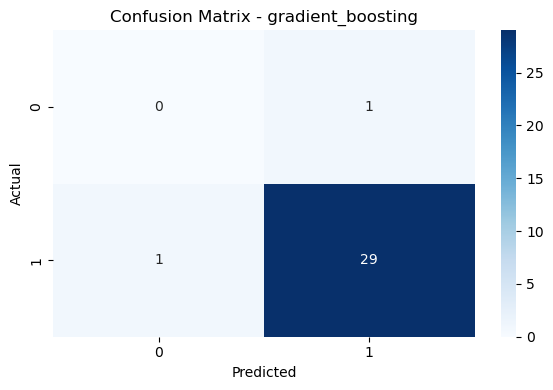


Training svm...

svm Performance:
Accuracy: 0.9677
Precision: 0.9677
Recall: 1.0000
F1_score: 0.9836


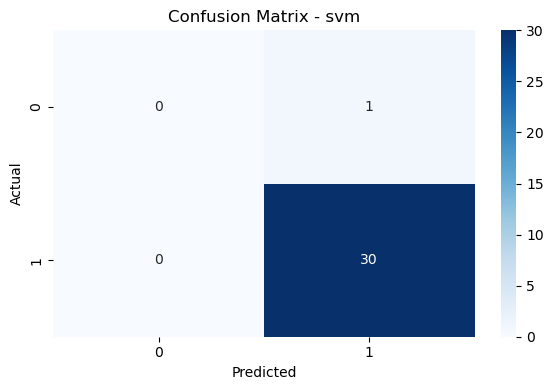


Best model: svm


In [10]:
print("\n=== Step 5: Model Training and Evaluation ===")
results, best_model = classifier.train_and_evaluate(features_df, feature_mask)

#### # Save the best model

In [49]:
classifier.save_model(best_model)

print("\n=== Research Completed ===")
print("Summary of Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: F1-Score = {metrics['f1_score']:.4f}")

Model saved to c:\Users\oktan\Research\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\models\trained\best_stego_classifier.pkl

=== Research Completed ===
Summary of Results:
random_forest: F1-Score = 0.9492
gradient_boosting: F1-Score = 0.9355
svm: F1-Score = 0.6667


## With Feature Balancing

In [13]:

def create_balanced_dataset(original_models, stego_models):
    """Create balanced dataset with augmented cover models"""
    
    # Step 1: Augment cover models
    augmentor = CoverDataAugmentation()
    augmented_covers = augmentor.create_augmented_cover_models(original_models, num_augmentations=50)
    
    # Step 2: Extract features with advanced extractor
    feature_extractor = AdvancedFeatureExtractor()
    stego_specific_extractor = SteganalysisSpecificFeatures()
    
    all_features_result = []
    
    # Extract from original cover models
    for model_name, model in original_models.items():
        print(f"Extracting features from original cover: {model_name}")
        basic_features = feature_extractor.extract_advanced_features(model, model_name, "cover")
        specific_features = stego_specific_extractor.extract_lsb_specific_features(model)
        combined_features = {**basic_features, **specific_features}
        all_features_result.append(combined_features)
    
    # Extract from augmented cover models
    for model_name, model in augmented_covers.items():
        print(f"Extracting features from augmented cover: {model_name}")
        basic_features = feature_extractor.extract_advanced_features(model, model_name, "cover")
        specific_features = stego_specific_extractor.extract_lsb_specific_features(model)
        combined_features = {**basic_features, **specific_features}
        all_features_result.append(combined_features)
    
    # Extract from stego models (balanced sampling)
    stego_count = 0
    max_stego_samples = len(all_features_result)  # Balance with cover samples
    
    for model_name, model in stego_models.items():
        if stego_count >= max_stego_samples:
            break
            
        print(f"Extracting features from stego: {model_name}")
        basic_features = feature_extractor.extract_advanced_features(model, model_name, "stego")
        specific_features = stego_specific_extractor.extract_lsb_specific_features(model)
        combined_features = {**basic_features, **specific_features}
        all_features_result.append(combined_features)
        stego_count += 1
    
    return all_features_result

In [14]:
balanced_feature = create_balanced_dataset(original_models, stego_models)

Creating augmented cover models for resnet50...
Creating augmented cover models for mobilenet_v3_small...
Test data prepared successfully
Extracting features from original cover: resnet50
Extracting features for resnet50...
  Extracted 2000 weight samples
Autoencoder trained successfully
  Reconstruction loss: 0.011427
  Gradient features: {'grad_mean': 1.2479471502513249, 'grad_std': 1.7162297236965927, 'grad_max': 7.741944789886475}
  Entropy features calculated for 4 bit-planes
Extracting features from original cover: mobilenet_v3_small
Extracting features for mobilenet_v3_small...
  Extracted 2000 weight samples
  Reconstruction loss: 0.300623
  Gradient features: {'grad_mean': 7.589836480751844, 'grad_std': 6.946875490564592, 'grad_max': 49.56467056274414}
  Entropy features calculated for 4 bit-planes
Extracting features from augmented cover: resnet50_cover_aug_0
Extracting features for resnet50_cover_aug_0...
  Extracted 2000 weight samples
  Reconstruction loss: 0.013626
  Grad

In [27]:
pd.DataFrame(balanced_feature)

,weight_mean,weight_std,weight_skew,weight_kurtosis,reconstruction_loss,grad_mean,grad_std,grad_max,entropy_bit_0,entropy_bit_1,...,spectral_entropy_mean,spectral_entropy_std,bit_transition_mean,bit_transition_std,spatial_corr_mean,spatial_corr_std,total_params,param_density,complexity_mean,complexity_std
0,-0.000395,0.125185,0.109559,15.701708,0.011427,1.247947,1.716230,7.741945,0.982373,0.987775,...,6.831149,0.000000,0.478044,0.102547,0.250018,0.703420,25557032,24.373085,484.954285,503.411438
1,-0.000198,0.512731,0.365854,17.216692,0.300623,7.589836,6.946875,49.564671,0.993617,0.993061,...,6.425920,0.190640,0.472728,0.102111,0.360960,0.742278,2542856,2.425056,657.310425,1556.948975
2,-0.005313,0.118695,-1.848303,23.147713,0.013626,40.606411,144.528108,1320.508423,0.988517,0.989588,...,6.831313,0.000000,0.475360,0.102637,0.223265,0.704786,25557032,24.373085,496.720551,515.502563
3,-0.005970,0.131384,-1.435718,21.947441,0.019821,1.306199,1.793831,7.744938,0.971533,0.999351,...,6.831262,0.000000,0.478035,0.102543,0.247698,0.703306,25557032,24.373085,487.103363,505.678680
4,-0.008568,0.132056,-3.155613,31.255529,0.019273,150.203636,446.399813,3393.219482,0.977023,0.997896,...,6.831115,0.000000,0.474987,0.103291,0.197271,0.710884,25557032,24.373085,532.135132,552.929016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-0.010026,0.505328,0.120838,13.646313,0.289565,7.883385,9.736672,88.253387,0.986617,0.990932,...,6.425919,0.190638,0.472794,0.102064,0.360964,0.742266,2542856,2.425056,657.314026,1556.970093
198,0.010295,0.488363,-0.035637,12.749538,0.254133,11.518682,21.818943,231.103745,0.987008,0.995829,...,6.425919,0.190641,0.472749,0.102146,0.360949,0.742236,2542856,2.425056,657.310852,1556.950562
199,-0.008881,0.496248,-0.059028,14.697574,0.284139,7.472034,6.358714,35.852749,0.983708,0.994149,...,6.425920,0.190640,0.472763,0.102105,0.360992,0.742270,2542856,2.425056,657.309692,1556.950195
200,0.002838,0.519399,0.538219,16.240885,0.306894,7.450618,6.594548,46.809864,0.987775,0.986617,...,6.425919,0.190640,0.472693,0.102140,0.360954,0.742277,2542856,2.425056,657.310791,1556.949097


In [39]:
import struct

def float32_to_binary_visual(float_num):
    # Konversi float ke 32-bit binary (IEEE 754 single precision)
    packed = struct.pack('>f', float_num)  # Big-endian float
    binary_str = ''.join(f'{byte:08b}' for byte in packed)

    # Gabungkan semua bit jadi satu string 32-bit
    full_binary = binary_str

    # Segmentasi: 1 bit sign, 8 bit exponent, 23 bit mantissa
    sign_bit = full_binary[0]
    exponent_bits = full_binary[1:9]
    mantissa_bits = full_binary[9:]

    # ANSI color codes untuk terminal
    GREEN = '\033[92m'     # Sign bit
    RED = '\033[91m'       # Exponent
    YELLOW = '\033[93m'    # Mantissa
    RESET = '\033[0m'

    # Tampilkan hasil
    print(f"Float: {float_num}")
    print(f"Hex: {packed.hex().upper()}")
    print("Binary:")
    print(f"{GREEN}{sign_bit}{RESET} {RED}{exponent_bits}{RESET} {YELLOW}{mantissa_bits}{RESET}")

# Contoh penggunaan
# float32_to_binary_visual(-15.625)

In [44]:
for i, feat in enumerate(balanced_feature):
    modelName = feat.get('model_name')
    modelType = feat.get('model_type')
    bit_plane_entropy_bit_0 = generetor.float_to_binary(feat.get('entropy_bit_0'))
    # print(f"Sample BIT-0 {modelName}-{modelType}: BitPlaneEntropi = {bit_plane_entropy_bit_0}")
    # print(f"Sample BIT-0 {modelName}-{modelType}: weight_entropy_bit_0 = {feat.get('entropy_bit_0')}")
    print(f"Sample BIT-0 {modelName}-{modelType}")
    float32_to_binary_visual(feat.get('entropy_bit_0'))
    print("==========================================")


Sample BIT-0 resnet50-cover
Float: 0.9823733825422625
Hex: 3F7B7CD2
Binary:
0 01111110 11110110111110011010010
Sample BIT-0 mobilenet_v3_small-cover
Float: 0.9936167534536142
Hex: 3F7E5DAB
Binary:
0 01111110 11111100101110110101011
Sample BIT-0 resnet50_cover_aug_0-cover
Float: 0.9885173903891564
Hex: 3F7D0F7A
Binary:
0 01111110 11111010000111101111010
Sample BIT-0 resnet50_cover_aug_1-cover
Float: 0.9715325521731815
Hex: 3F78B65B
Binary:
0 01111110 11110001011011001011011
Sample BIT-0 resnet50_cover_aug_2-cover
Float: 0.977022578532774
Hex: 3F7A1E27
Binary:
0 01111110 11110100001111000100111
Sample BIT-0 resnet50_cover_aug_3-cover
Float: 0.9634967421655787
Hex: 3F76A7B9
Binary:
0 01111110 11101101010011110111001
Sample BIT-0 resnet50_cover_aug_4-cover
Float: 0.977022578532774
Hex: 3F7A1E27
Binary:
0 01111110 11110100001111000100111
Sample BIT-0 resnet50_cover_aug_5-cover
Float: 0.9805107178796568
Hex: 3F7B02C0
Binary:
0 01111110 11110110000001011000000
Sample BIT-0 resnet50_cover_aug_

In [22]:
features_df_balanced = pd.DataFrame(balanced_feature)
new_features_path = os.path.join(config.DATA_DIR, "features", "all_features_with_balacing.csv")
features_df_balanced.to_csv(new_features_path, index=False)
print(f"Features saved to {new_features_path}")

Features saved to c:\Users\oktan\Research\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\data\features\all_features_with_balacing.csv


In [24]:
print("\n=== Step 4: Feature Selection with PSO ===")
classifier = StegoClassifier()
X, y = classifier.prepare_data(features_df_balanced)

pso_selector = PSOFeatureSelection()
feature_mask_balanced, best_score = pso_selector.optimize(X, y)


=== Step 4: Feature Selection with PSO ===
Starting PSO feature selection with 34 features...
Iteration 10/20, Best F1: 0.9638
Iteration 20/20, Best F1: 0.9638
PSO completed. Best F1-score: 0.9638
Selected 16 out of 34 features



=== Step 5: Model Training and Evaluation ===
Using 16 selected features

Training random_forest...

random_forest Performance:
Accuracy: 0.9508
Precision: 0.9655
Recall: 0.9333
F1_score: 0.9492


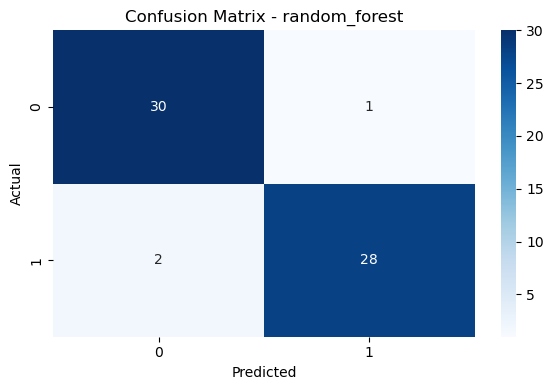


Training gradient_boosting...

gradient_boosting Performance:
Accuracy: 0.9344
Precision: 0.9062
Recall: 0.9667
F1_score: 0.9355


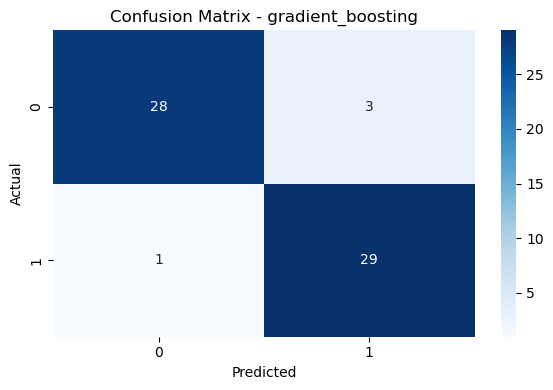


Training svm...

svm Performance:
Accuracy: 0.5082
Precision: 0.5000
Recall: 1.0000
F1_score: 0.6667


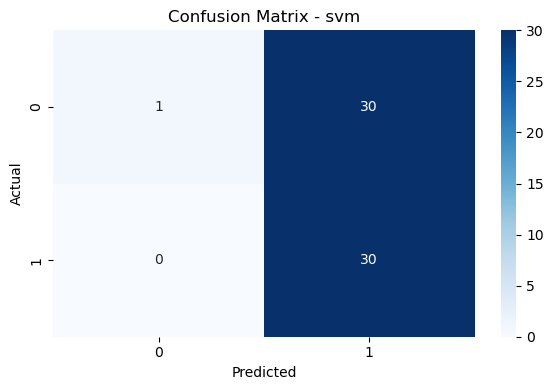


Best model: random_forest


In [45]:
print("\n=== Step 5: Model Training and Evaluation ===")
results_balanced, best_model_balanced = classifier.train_and_evaluate(features_df_balanced, feature_mask_balanced)

In [47]:
classifier.save_model(best_model_balanced, filename="best_stego_classifier_advenced.pkl")

print("\n=== Research Completed ===")
print("Summary of Results:")
for model_name, metrics in results_balanced.items():
    print(f"{model_name}: F1-Score = {metrics['f1_score']:.4f}")

Model saved to c:\Users\oktan\Research\Steganalysis-for-LSB-Attack-Detection-in-Neural-Net-Models\steganalysis_ai_v2\models\trained\best_stego_classifier_advenced.pkl

=== Research Completed ===
Summary of Results:
random_forest: F1-Score = 0.9492
gradient_boosting: F1-Score = 0.9355
svm: F1-Score = 0.6667


## # PREDICT